## Car Evaluation - ***Solución propuesta por [Carlos Mazzaroli](https://deepnote.com/app/mazzaroli/Decision-Trees-y-Random-Forest-con-Python-y-scikit-learn-22e03409-93bd-4c7e-9ade-f94470cd6941)***

### ***Datasource***

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set   
y utilizaremos árboles de decisión para construir el modelo de clasificación capaz de ***predecir la calidad de compra de un automóvil***.  

El "***Car Evaluation Data Set***" ***consta de 1728 instancias*** etiquetadas con la clase de calidad de compra del automóvil, cada una de las cuales tiene ***6 atributos discretos***: precio, mantenimiento, número de puertas, número de pasajeros máximo, tamaño del maletero, y seguridad. Además, hay una variable objetivo, la evaluación de la calidad.

1) ***Price (precio)***    
    * ***vhigh*** (muy caro)  
    * ***high*** (caro)  
    * ***med*** (medio)  
    * ***low*** (barato)

2) ***Maint (mantenimiento)***  
    * ***vhigh*** (muy caro)  
    * ***high*** (caro)
    * ***med*** (medio)  
    * ***low*** (económico)

3) ***Doors (número de puertas)***  
    * ***2***  
    * ***3***  
    * ***4***  
    * ***5more*** (5 o más)  

4) ***Persons (número de pasajeros máximo)***   
    * ***2***  
    * ***4***  
    * ***more*** (más de 4)  

5) ***Lug_boot (tamaño del maletero)***   
    * ***small*** (pequeño)  
    * ***med*** (mediano)  
    * ***big*** (grande)  

6) ***Safety (seguridad)***  
    * ***low*** (baja)  
    * ***med*** (media)  
    * ***high*** (alta)

* ***Class (evaluación de la calidad - variable objetivo -)***  
    * ***unacc*** (inaceptable)  
    * ***acc*** (aceptable)  
    * ***good*** (buena)  
    * ***vgood*** (muy buena)  

### ***Decision tree***

#### ***Dataset***

In [1]:
# Importación de librerias principales
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

sns.set(style='whitegrid', context='notebook')

# Carga del dataset
df_car = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)

columns_names = ['price','maint','doors','persons','lug_boot','safety','Class']

df_car.columns = columns_names

### ***EDA***

In [2]:
# Visualización del dataframe
df_car.head()

,price,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# Análisis del shape del objeto
print(df_car.shape)

(1728, 7)


In [4]:
# Visualización de los tipos de datos
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


***Conclusiones preliminares***

* Hay 7 variables en el conjunto de datos, donde todas están clasificadas como *datos categóricos*.
* La variable **Class** es el *objetivo del análisis*.

***Exploración de la variable target***

In [5]:
# Missing values
df_car.isnull().sum()

price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

In [6]:
# Drop duplicates
df_car.drop_duplicates()

,price,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [7]:
# Null values - no hay datos nulos en el dataset
df_car.isnull().sum()

price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

***Distribución de frecuencia y proproción de variables***

In [8]:
# Cuenta y proporción de los datos
def dist(df,target):
    count= df[target].value_counts(normalize=False)
    prop = df[target].value_counts(normalize=True)

    dist = pd.DataFrame({'Freq[N]':count,'Prop[%]':prop.round(3)})
    return dist

# Cuenta y proporción de Class
for i in columns_names:
    print(' '*7,i.upper())
    print(dist(df_car,i))
    print("*"*23)

        PRICE
       Freq[N]  Prop[%]
price                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
***********************
        MAINT
       Freq[N]  Prop[%]
maint                  
vhigh      432     0.25
high       432     0.25
med        432     0.25
low        432     0.25
***********************
        DOORS
       Freq[N]  Prop[%]
doors                  
2          432     0.25
3          432     0.25
4          432     0.25
5more      432     0.25
***********************
        PERSONS
         Freq[N]  Prop[%]
persons                  
2            576    0.333
4            576    0.333
more         576    0.333
***********************
        LUG_BOOT
          Freq[N]  Prop[%]
lug_boot                  
small         576    0.333
med           576    0.333
big           576    0.333
***********************
        SAFETY
        Freq[N]  Prop[%]
safety                  
low         576    0.333
med         576   

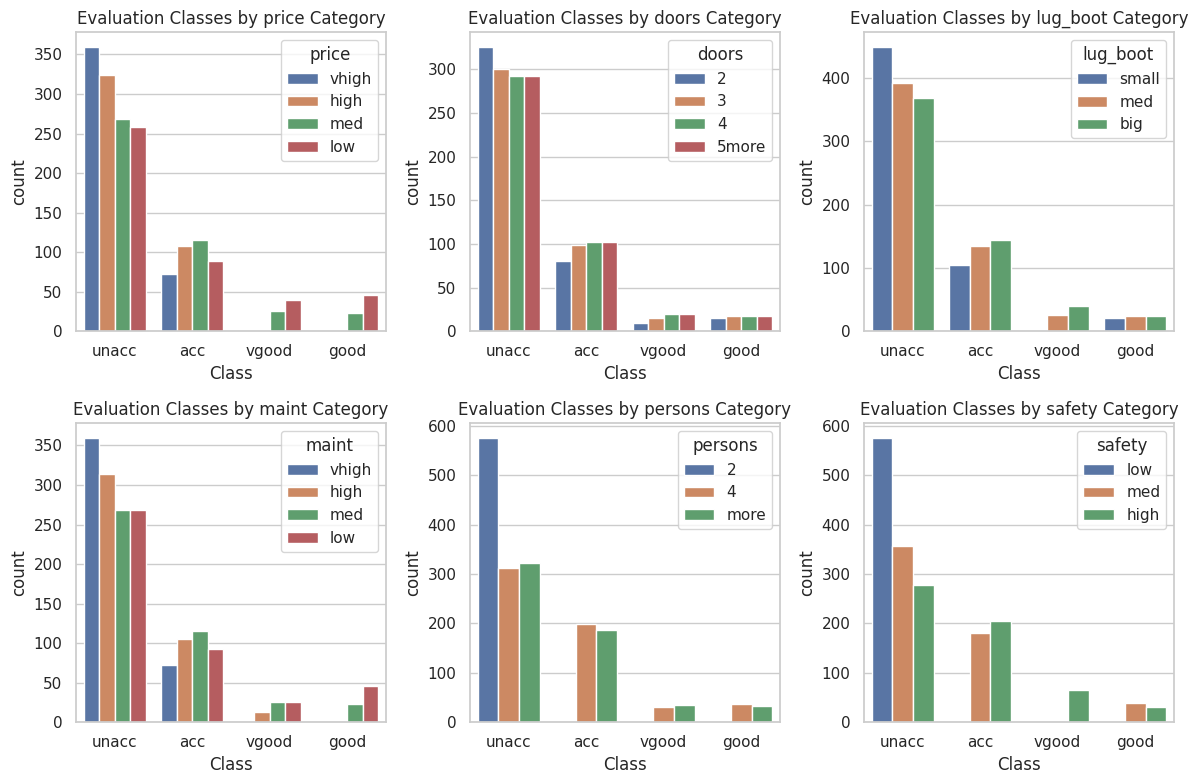

In [9]:
# Gráfica de la variable target separada por los atributos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, variable in enumerate(columns_names[:-1]):
    row = i % 2
    col = i // 2
    sns.countplot(data=df_car, x='Class',hue=variable, ax=axes[row][col])
    axes[row][col].set_title(f"Evaluation Classes by {variable} Category")

plt.tight_layout()
plt.show()

***Insight (visión de los datos)***

* ***Price***: Los coches con precios bajos o medios tienen una mayor probabilidad de ser clasificados como vgood o good, en comparación con los coches de precio alto.

* ***Doors***: Los coches con 4 o más puertas tienen una mayor probabilidad de ser clasificados como vgood o good, en comparación con los coches de 3 o 2 puertas.

* ***Lug_boot***: Los coches con maletero grande o mediano tienen una mayor probabilidad de ser clasificados como vgood o good, en comparación con los coches con maletero pequeño.

* ***Maint***: Los coches con costos de mantenimiento bajos o medios tienen una mayor probabilidad de ser clasificados como vgood o good, en comparación con los coches con costos de mantenimiento altos.

* ***Persons***: Los coches con capacidad de 4 o más personas tienen una mayor probabilidad de ser clasificados como vgood o good, en comparación con los coches con capacidad de menos de 4 personas.

* ***Safety***: Los coches con alto nivel de seguridad tienen una mayor probabilidad de ser clasificados como vgood o good, en comparación con los coches con bajo o medio nivel de seguridad.

### ***Feature Engineering***

In [10]:
# Separación de datos en X e y (target & predictor variables)
X_car = df_car.drop('Class',axis=1)
y_car = df_car.Class

In [11]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)
X_car, y_car = undersample.fit_resample(X_car,y_car)

In [12]:
#Codificación de las variables categóricas.
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [13]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=columns_names[:-1])

X_car = encoder.fit_transform(X_car)

X_car.head()

,price,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,2,2,1,1,1
2,2,2,3,1,1,1
3,2,2,4,2,2,2
4,3,3,3,2,1,2


In [14]:
X_car.dtypes

price       int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
dtype: object

### ***Training***

#### ***Split data - training & testing***

In [15]:
from sklearn.model_selection import train_test_split

X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(X_car,y_car,test_size=0.3, random_state=42)

print('X:',X_train_car.shape, X_test_car.shape)
print('y:',y_train_car.shape, y_test_car.shape)

X: (182, 6) (78, 6)
y: (182,) (78,)


In [16]:
#Entrenamiento del modelo
from sklearn.tree import DecisionTreeClassifier

# Instancia del modelo
tree_car = DecisionTreeClassifier(random_state=42)

#### ***Hiperparameters***

In [17]:
from sklearn.model_selection import GridSearchCV

# Parámetros del decision tree
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

# Búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(tree_car, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_car, y_train_car)

# Impresión de los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 4}
Mejor puntuación de validación cruzada:
0.8026315789473685


In [18]:
# Modelo decision tree con parámetros optimizados
best_tree_car = grid_search.best_estimator_

# Predicción de Y
y_train_pred_tree_car = best_tree_car.predict(X_train_car)
y_test_pred_tree_car = best_tree_car.predict(X_test_car)

### ***Test & validation***

In [19]:
from sklearn.metrics import accuracy_score, classification_report

# Cálculo del accuract en train(ing)
train_acc = accuracy_score(y_true=y_test_car,y_pred=y_test_pred_tree_car)

# Cálculo el accuract en test
test_acc  = accuracy_score(y_true=y_train_car,y_pred=y_train_pred_tree_car)

print("El accuracy en train(ing) es:",train_acc)
print("El accuracy en test es:",test_acc)

El accuracy en train(ing) es: 0.717948717948718
El accuracy en test es: 0.8131868131868132


La **precisión** en los conjuntos de datos de entrenamiento y  de prueba están muy cercanas, lo que sugiere que el modelo no está sufriendo de **sobreajuste**.  

In [20]:
print(classification_report(y_test_car,y_test_pred_tree_car))

              precision    recall  f1-score   support

         acc       0.77      0.62      0.69        16
        good       0.65      0.48      0.55        23
       unacc       1.00      0.80      0.89        20
       vgood       0.59      1.00      0.75        19

    accuracy                           0.72        78
   macro avg       0.75      0.73      0.72        78
weighted avg       0.75      0.72      0.71        78



Podemos observar que el ***f1-score de la clase 'good' es relativamente bajo***, mientras que el ***f1-score de 'unacc' es alto***. Esto sugiere que el modelo tiene dificultades para clasificar correctamente la **clase** 'good'. Por otro lado, el ***f1-score de 'acc' y 'vgood' es promedio***.  

***El f1-score promedio general es de 0.72***, lo cual indica que ***el modelo tiene un buen rendimiento general en la clasificación*** de las distintas **clases**.  

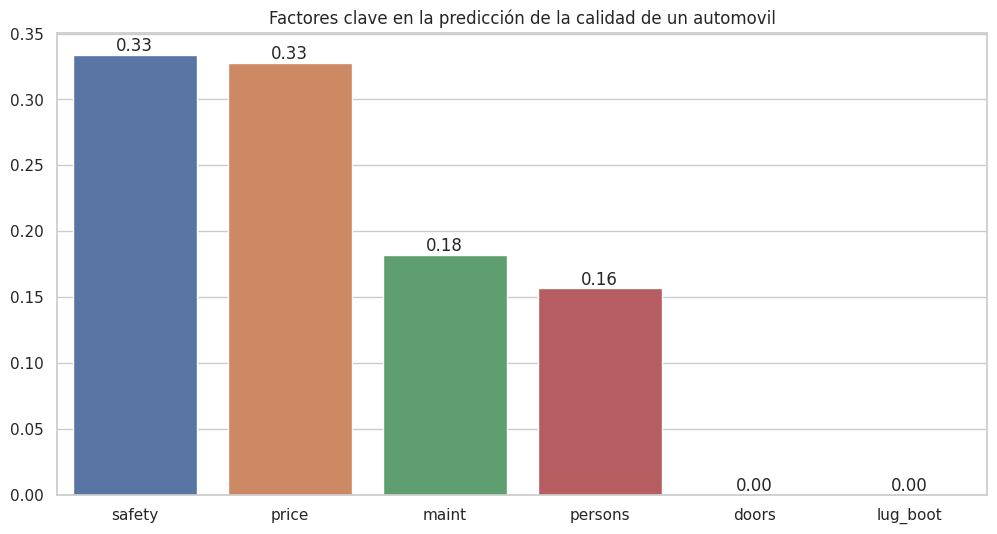

,0
safety,0.333983
price,0.327521
maint,0.182004
persons,0.156493
doors,0.000000
lug_boot,0.000000


In [21]:
feature_scores_car = pd.DataFrame(pd.Series(best_tree_car.feature_importances_, index=X_train_car.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_car)

for index, value in enumerate(feature_scores_car.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la calidad de un automovil")
plt.show()
pd.DataFrame(feature_scores_car.T)

El ***precio y el mantenimiento*** de un automóvil son ***factores cruciales*** en la determinación de su ***clasificación***.  

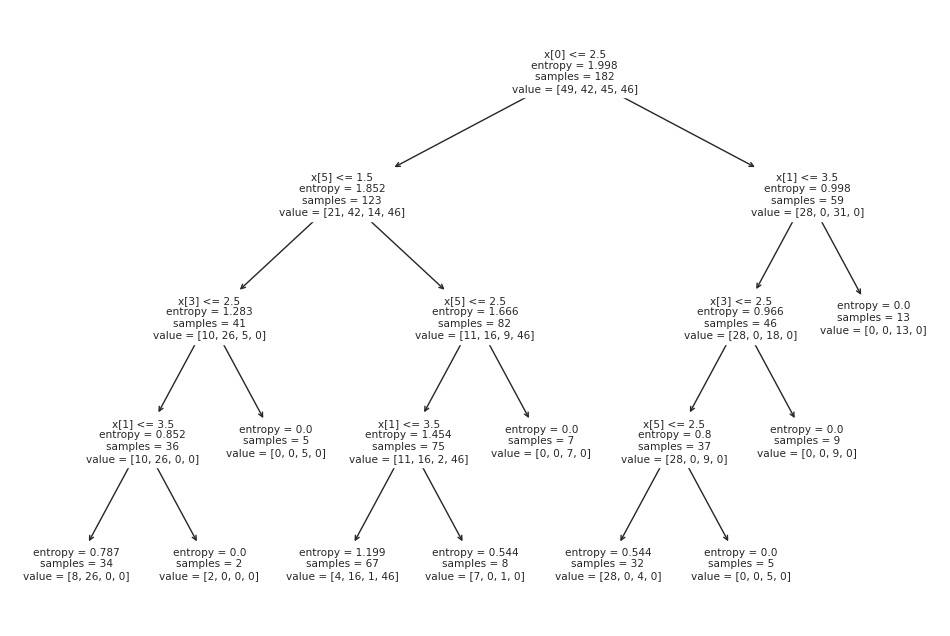

In [22]:
plt.figure(figsize = (12,8))
from sklearn import tree

tree.plot_tree(best_tree_car.fit(X_train_car, y_train_car));

### ***Random forest***

In [23]:
X_car

,price,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,2,2,1,1,1
2,2,2,3,1,1,1
3,2,2,4,2,2,2
4,3,3,3,2,1,2
...,...,...,...,...,...,...
255,2,3,3,1,1,2
256,2,3,2,2,3,2
257,2,3,2,2,1,2
258,2,3,2,1,3,2


In [24]:
X_train_car,X_test_car,y_train_car,y_test_car = train_test_split(X_car,y_car, random_state=42)

#### ***Entrenamiento del modelo***

In [25]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

rfc_car = RandomForestClassifier(n_estimators=5,random_state=42)

rfc_car.fit(X_train_car,y_train_car)

RandomForestClassifier(n_estimators=5, random_state=42)

In [26]:
y_pred_test_car = rfc_car.predict(X_test_car)
y_pred_train_car = rfc_car.predict(X_train_car)

#### ***Evaluacion del modelo***

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(y_train_car,y_pred_train_car))
print(accuracy_score(y_test_car,y_pred_test_car))

0.9846153846153847
0.9076923076923077


In [28]:
print(classification_report(y_test_car,y_pred_test_car))

              precision    recall  f1-score   support

         acc       0.86      0.75      0.80        16
        good       0.85      1.00      0.92        17
       unacc       0.93      0.87      0.90        15
       vgood       1.00      1.00      1.00        17

    accuracy                           0.91        65
   macro avg       0.91      0.90      0.90        65
weighted avg       0.91      0.91      0.91        65



#### ***Feature Engineering (Ingeniería de características)***

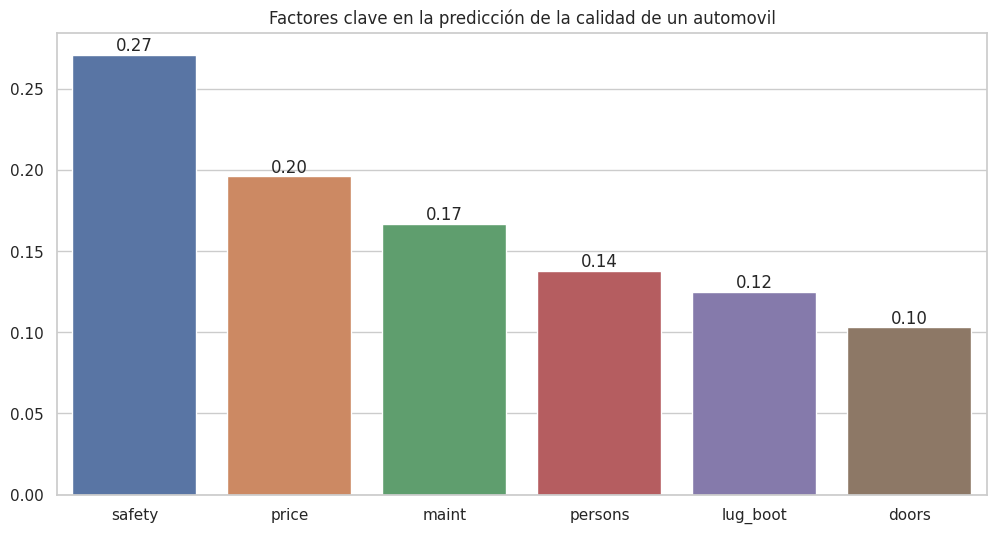

,0
safety,0.271247
price,0.196142
maint,0.166684
persons,0.137885
lug_boot,0.124887
doors,0.103154


In [30]:
feature_scores_car = pd.DataFrame(pd.Series(rfc_car.feature_importances_, index=X_train_car.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_car)

for index, value in enumerate(feature_scores_car.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la calidad de un automovil")
plt.show()
pd.DataFrame(feature_scores_car).T

Un análisis de las importancias de las características revela que las características más influyentes para la evaluación del modelo de coches son:

* ***safety***: Con una importancia de 0.271247, se ***destaca como la característica más importante***. Esto indica que la seguridad del vehículo tiene un ***impacto significativo en la evaluación***.

* ***price***: ***El precio del coche es la segunda característica más relevante***, con una importancia de 0.196142. Esto sugiere que ***el precio juega un papel crucial en la evaluación de los vehículos***.

* ***maint***: ***El costo de mantenimiento se posiciona como la tercera característica más importante***, con una importancia de 0.166684. Esto indica que ***el costo de mantenimiento también contribuye significativamente a la evaluación de los coches***.

* ***persons***: La capacidad de pasajeros es ***la cuarta característica más importante***, con una importancia de 0.137885. Esto sugiere que ***la cantidad de personas que el coche puede acomodar también es un factor relevante en la evaluación***.

* ***lug_boot***: ***El tamaño del maletero*** tiene una importancia de 0.124887. Esto indica que la capacidad de almacenamiento ***también contribuye a la evaluación de los vehículos***.

* ***doors***: ***El número de puertas se posiciona como la sexta característica más importante***, con una importancia de 0.103154. Esto sugiere que ***la cantidad de puertas también puede afectar la evaluación de los coches***.

Estos resultados resaltan la ***importancia de características clave*** como la ***seguridad, el precio, el costo de mantenimiento***.

En cuanto a las ***características*** que podrían considerarse ***menos importantes*** estan ***la capacidad de pasajeros, el tamaño del maletero y el número de puertas***.

Estas características tienen importancias relativamente más bajas en comparación con las tres primeras mencionadas. Sin embargo, aún contribuyen al proceso de evaluación de los coches y pueden proporcionar información adicional.